In [2]:
# Import important packages
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.ensemble import IsolationForest 
from sklearn.neighbors import LocalOutlierFactor 
# Importing KNN module from PyOD
from pyod.models.knn import KNN 
from pyod.models.ocsvm import OCSVM 
# Import the utility function for model evaluation
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [3]:
data = pd.read_excel("C:\\Users\\ASUS\\Downloads\\New Credit card data.xlsx")
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#missing values check 
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

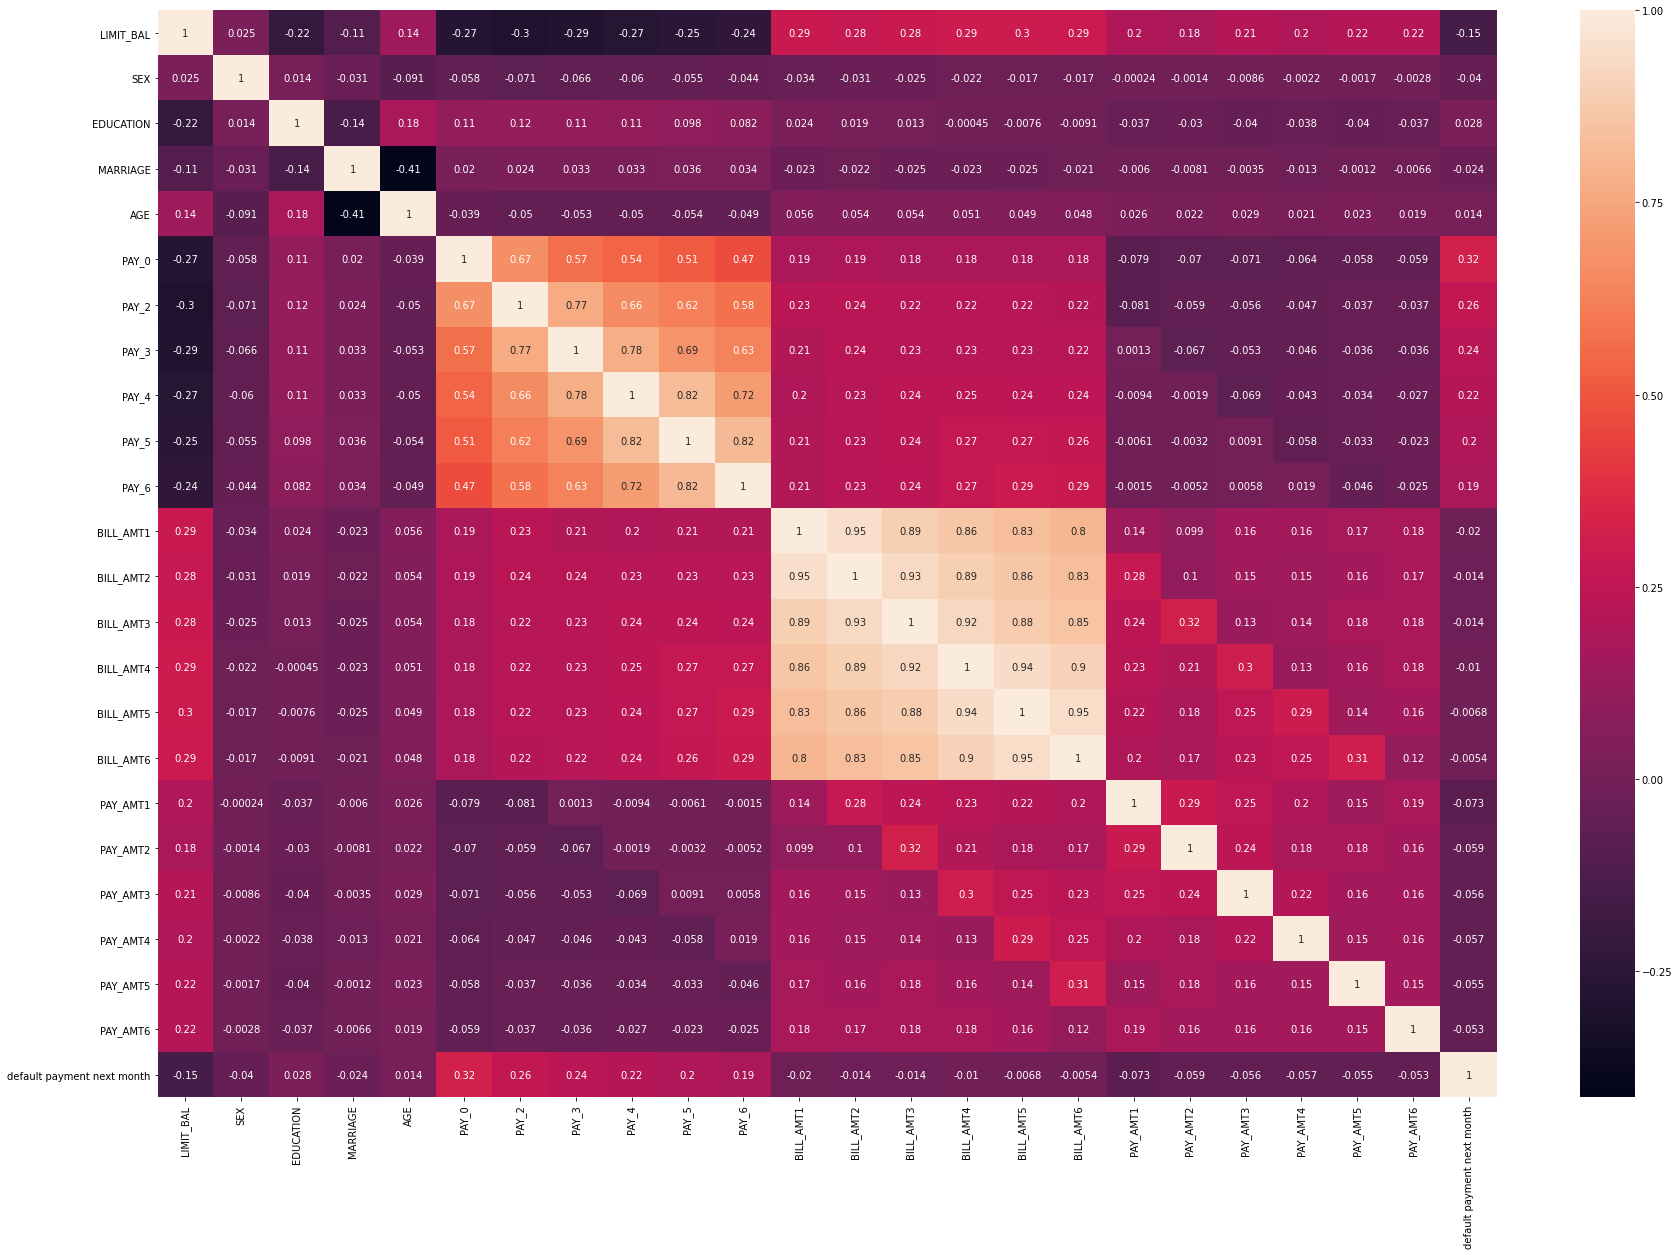

In [5]:
#Correlation
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(), annot = True)
plt.title=("Correlation Matrix")
plt.show()

In [6]:
#Defining x and y in original dataset
x = data.drop(columns ='default payment next month')
y = data['default payment next month']

In [7]:
x_data = pd.DataFrame(x)
y_data = pd.DataFrame(y)
#Scaling 
x_scaled = StandardScaler().fit_transform(x_data)
x1 = pd.DataFrame(x_scaled, index = x_data.index, columns = x_data.columns)
x1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [8]:
#Scaled data
d1 = pd.concat([x1, y_data], axis = 1)
d1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


In [9]:
#Defining new x and y in the scaled data
x_new = d1.drop(columns ='default payment next month')
y_new = d1['default payment next month']

In [10]:
#Removing outlier - z_score
from scipy import stats
z = np.abs(stats.zscore(d1))
print(z)     

[[1.13672015 0.81016074 0.18582826 ... 0.31413612 0.29338206 1.87637834]
 [0.3659805  0.81016074 0.18582826 ... 0.31413612 0.18087821 1.87637834]
 [0.59720239 0.81016074 0.18582826 ... 0.24868274 0.01212243 0.53294156]
 ...
 [1.05964618 1.23432296 0.18582826 ... 0.18322937 0.11900109 1.87637834]
 [0.67427636 1.23432296 1.45111372 ... 3.15253642 0.19190359 1.87637834]
 [0.90549825 1.23432296 0.18582826 ... 0.24868274 0.23713013 1.87637834]]


In [11]:
#Removing outliers
threshold = 3
d1.shape

(30000, 24)

In [12]:
#creating new dataframe after remmoving outliers
d2 = d1[(z<3).all(axis=1)]
d2.shape

(26429, 24)

In [13]:
#Thus will go by z-score
#defining x and y in new data after scaling and removing outlier
x1 = d2.drop(columns ='default payment next month')
y1 = d2['default payment next month']

<AxesSubplot:>

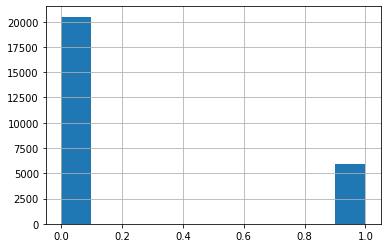

In [14]:
#To check whether data is balanced or not
y1.hist()  #seen imbalanced data

In [15]:
#SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

num_before = dict(Counter(y1))
print(num_before)

#Define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

#Transforming the dataset
x_smote, y_smote = pipeline.fit_resample(x1, y1)

#The numbers after SMOTE
num_after =dict(Counter(y_smote))
print(num_after)

{1: 5935, 0: 20494}
{0: 20493, 1: 16395}


In [16]:
#Creating a dataframe with balanced data (which is also scaled data + outliers are also removed)
X1 = pd.DataFrame(x_smote)
Y1 = pd.DataFrame(y_smote)
d4 = pd.concat([X1,Y1],axis =1)
d4.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,-0.905498,0.810161,1.451114,0.858557,-1.462993,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.459057,-0.434574,-0.623020,-0.262910,-0.204907,-0.226828,-0.251187,-0.023850,-0.190104,0
1,1.483795,0.810161,1.451114,-1.057295,1.032193,0.014861,0.111736,0.138865,0.188746,0.234917,...,2.204292,2.545517,-0.199280,0.865569,0.437440,-0.012818,0.968596,1.649465,0.269137,0
2,-0.211833,0.810161,-1.079457,0.858557,0.489762,0.904712,1.782348,0.138865,0.188746,0.234917,...,1.240616,0.938721,1.015770,-0.341942,0.029506,0.016830,-0.103797,-0.098140,-0.096500,0
3,1.021351,0.810161,-1.079457,-1.057295,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,-0.647565,...,-0.391750,-0.531208,-0.555870,1.644715,0.370515,0.729003,0.203622,0.063399,0.113263,0
4,0.096463,0.810161,2.716399,-1.057295,-0.161156,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,...,-0.574847,-0.526833,-0.652724,0.074166,0.042136,0.059995,-0.180397,-0.314136,-0.293382,0


In [17]:
#Train and test split on this new data
x = d4.drop(columns ='default payment next month')
y = d4['default payment next month']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=1)

In [18]:
#LOGIT to check for insignificant data and remove them
#Logistic Regression as model summary
import statsmodels.api as sm
res = sm.Logit(y,x).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.626548
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                36888
Model:                                  Logit   Df Residuals:                    36865
Method:                                   MLE   Df Model:                           22
Date:                        Wed, 14 Oct 2020   Pseudo R-squ.:                 0.08795
Time:                                01:45:59   Log-Likelihood:                -23112.
converged:                               True   LL-Null:                       -25341.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL     -0.0595      0.015     -3.870      0.000      -0.090      -0.029
SEX           -0.0615      0.011     -5.458      0.000      -0.084      -0.039
EDUCATION     -0.0291      0.014     -2.140      0.032      -0.056      -0.002
MARRIAGE      -0.0658      0.012     -5.294      0.000      -0.090      -0.041
AGE            0.0635      0.013      4.860      0.000       0.038       0.089
PAY_0          0.5713      0.015     37.593      0.000       0.541       0.601
PAY_2          0.1577      0.019      8.163      0.000       0.120       0.196
PAY_3          0.0622      0.021      2.941      0.003       0.021       0.104
PAY_4          0.0510      0.023      2.219      0.027       0.006       0.096
PAY_5         -0.0033      0.024     -0.135      0.893      -0.051       0.045
PAY_6         -0.0389      0.021     -1.893      0.058      -0.079       0.001
BILL_AMT1     -0.7040      0.074     -9.481      0.000      -0.850      -0.558
BILL_AMT2      0.1525      0.103      1.478      0.139      -0.050       0.355
BILL_AMT3      0.1414      0.094      1.499      0.134      -0.043       0.326
BILL_AMT4      0.0474      0.091      0.520      0.603      -0.131       0.226
BILL_AMT5     -0.1559      0.108     -1.442      0.149      -0.368       0.056
BILL_AMT6      0.2962      0.086      3.459      0.001       0.128       0.464
PAY_AMT1      -0.1414      0.044     -3.202      0.001      -0.228      -0.055
PAY_AMT2      -0.1911      0.055     -3.487      0.000      -0.299      -0.084
PAY_AMT3      -0.0613      0.045     -1.356      0.175      -0.150       0.027
PAY_AMT4       0.0529      0.043      1.243      0.214      -0.031       0.136
PAY_AMT5      -0.0530      0.045     -1.189      0.234      -0.140       0.034
PAY_AMT6       0.1782      0.041      4.321      0.000       0.097       0.259
==============================================================================
"""

In [19]:
#Removing most insignificant variables
x.drop(['PAY_5','BILL_AMT2','BILL_AMT4','PAY_AMT3','PAY_AMT4'],1,inplace=True)

In [20]:
#Applying logit again
res1 = sm.Logit(y,x).fit()
res1.summary()

Optimization terminated successfully.
         Current function value: 0.626621
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                36888
Model:                                  Logit   Df Residuals:                    36870
Method:                                   MLE   Df Model:                           17
Date:                        Wed, 14 Oct 2020   Pseudo R-squ.:                 0.08784
Time:                                01:46:00   Log-Likelihood:                -23115.
converged:                               True   LL-Null:                       -25341.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL     -0.0601      0.015     -3.926      0.000      -0.090      -0.030
SEX           -0.0616      0.011     -5.468      0.000      -0.084      -0.039
EDUCATION     -0.0290      0.014     -2.135      0.033      -0.056      -0.002
MARRIAGE      -0.0659      0.012     -5.299      0.000      -0.090      -0.042
AGE            0.0637      0.013      4.877      0.000       0.038       0.089
PAY_0          0.5719      0.015     37.696      0.000       0.542       0.602
PAY_2          0.1570      0.019      8.150      0.000       0.119       0.195
PAY_3          0.0632      0.021      2.992      0.003       0.022       0.105
PAY_4          0.0510      0.020      2.526      0.012       0.011       0.091
PAY_6         -0.0414      0.017     -2.395      0.017      -0.075      -0.008
BILL_AMT1     -0.6243      0.050    -12.479      0.000      -0.722      -0.526
BILL_AMT3      0.2322      0.068      3.433      0.001       0.100       0.365
BILL_AMT5     -0.1127      0.091     -1.245      0.213      -0.290       0.065
BILL_AMT6      0.2829      0.083      3.419      0.001       0.121       0.445
PAY_AMT1      -0.1216      0.040     -3.013      0.003      -0.201      -0.042
PAY_AMT2      -0.2182      0.051     -4.270      0.000      -0.318      -0.118
PAY_AMT5      -0.0517      0.043     -1.210      0.226      -0.135       0.032
PAY_AMT6       0.1755      0.041      4.317      0.000       0.096       0.255
==============================================================================
"""

In [21]:
x.drop(['BILL_AMT5','PAY_AMT5'],1,inplace = True)

In [22]:
#Since all remaining variables are significant now, we can move ahead
res2 = sm.Logit(y,x).fit()
res2.summary()

Optimization terminated successfully.
         Current function value: 0.626653
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                36888
Model:                                  Logit   Df Residuals:                    36872
Method:                                   MLE   Df Model:                           15
Date:                        Wed, 14 Oct 2020   Pseudo R-squ.:                 0.08779
Time:                                01:46:00   Log-Likelihood:                -23116.
converged:                               True   LL-Null:                       -25341.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL     -0.0622      0.015     -4.087      0.000      -0.092      -0.032
SEX           -0.0615      0.011     -5.466      0.000      -0.084      -0.039
EDUCATION     -0.0287      0.014     -2.113      0.035      -0.055      -0.002
MARRIAGE      -0.0660      0.012     -5.309      0.000      -0.090      -0.042
AGE            0.0639      0.013      4.888      0.000       0.038       0.089
PAY_0          0.5725      0.015     37.764      0.000       0.543       0.602
PAY_2          0.1564      0.019      8.128      0.000       0.119       0.194
PAY_3          0.0630      0.021      2.983      0.003       0.022       0.104
PAY_4          0.0513      0.020      2.542      0.011       0.012       0.091
PAY_6         -0.0416      0.017     -2.429      0.015      -0.075      -0.008
BILL_AMT1     -0.6282      0.050    -12.562      0.000      -0.726      -0.530
BILL_AMT3      0.2198      0.065      3.400      0.001       0.093       0.346
BILL_AMT6      0.1837      0.039      4.660      0.000       0.106       0.261
PAY_AMT1      -0.1312      0.040     -3.311      0.001      -0.209      -0.054
PAY_AMT2      -0.2298      0.050     -4.589      0.000      -0.328      -0.132
PAY_AMT6       0.1622      0.039      4.118      0.000       0.085       0.239
==============================================================================
"""

In [23]:
#TECHNIQUES
#LR
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm_lr = confusion_matrix(y_test, y_pred_test)
acc_lr = accuracy_score(y_test, y_pred_test)
pre_lr = precision_score(y_test, y_pred_test)
recall_lr = recall_score(y_test, y_pred_test)
f1_lr = f1_score(y_test, y_pred_test)

print('Confusion Matrix : \n',cm_lr)
print('Accuracy : ',acc_lr)
print('Precision score', pre_lr)
print('Recall score',recall_lr)
print('F1 score',f1_lr)

Confusion Matrix : 
 [[4017 1120]
 [1665 2420]]
Accuracy :  0.698004771199306
Accuracy for train data 0.6940287717776332
Precision score 0.6836158192090396
Recall score 0.5924112607099143
F1 score 0.6347540983606558


In [25]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(x_train, y_train)
y_pred_rf = classifier.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm_rf= confusion_matrix(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
pre_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print('Confusion Matrix : \n',cm_rf)
print('Accuracy : ',acc_rf)
print('Precision score : ', pre_rf)
print('Recall score : ',recall_rf)
print('F1 score : ',f1_rf) 

Confusion Matrix : 
 [[4554  583]
 [ 994 3091]]
Accuracy :  0.8289958794187812
Precision score :  0.8413173652694611
Recall score :  0.7566707466340269
F1 score :  0.7967521587833484


In [27]:
#KNN
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

In [28]:
from sklearn.neighbors import KNeighborsClassifier

bestScore=0.0
accList=[]

for k in range(3,12):   #Minimum and max no of nearest neighbors given in form of range
    
    clf_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
    # using 10 fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(clf_knn, x_train, y_train, cv=10)
    score=scores.mean()
    accList.append(score)  #appending mean of all scores in form of list
    
    if score > bestScore:
        bestScore=score
        best_clf=clf_knn
        bestK=k
        
print("Best K is :",bestK,"| Cross validation Accuracy :",bestScore)
clf_knn=best_clf

Best K is : 3 | Cross validation Accuracy : 0.7653067306790259


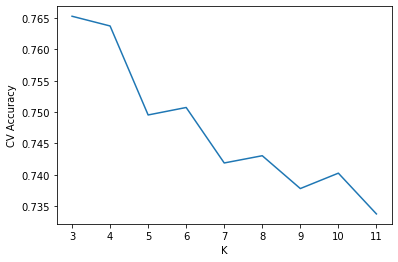

In [29]:
#Plotting CV accuracy curve for clarity
plt.plot(range(3,12),accList)  #Scores list
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()

In [30]:
#Checking predicting accuracy of KNN
clf_knn.fit(x_train,y_train)
y_pred_knn=best_clf.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm_knn= confusion_matrix(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
pre_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print('Confusion Matrix : \n',cm_knn)
print('Accuracy : ',acc_knn)
print('Precision score : ', pre_knn)
print('Recall score : ',recall_knn)
print('F1 score : ',f1_knn)

Confusion Matrix : 
 [[3598 1539]
 [ 594 3491]]
Accuracy :  0.7687052700065062
Precision score :  0.6940357852882704
Recall score :  0.8545899632802938
F1 score :  0.7659901261656611


In [35]:
#SVM
from sklearn import svm
clf = svm.SVC()

In [36]:
clf.fit(x_train, y_train)
y_pred_svm = clf.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm_svm = confusion_matrix(y_test, y_pred_svm)
acc_svm = accuracy_score(y_test, y_pred_svm)
pre_svm= precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print('Confusion Matrix : \n',cm_svm)
print('Accuracy : ',acc_svm)
print('Precision score : ', pre_svm)
print('Recall score : ',recall_svm)
print('F1 score : ',f1_svm)

Confusion Matrix : 
 [[4384  753]
 [1771 2314]]
Accuracy :  0.7263066579917589
Precision score :  0.7544832083469188
Recall score :  0.5664626682986537
F1 score :  0.6470917225950783


In [38]:
#Decision Tree
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(x_train, y_train)

y_pred_tree=clf_tree.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm_tree= confusion_matrix(y_test, y_pred_tree)
acc_tree = accuracy_score(y_test, y_pred_tree)
pre_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print('Confusion Matrix : \n',cm_tree)
print('Accuracy : ',acc_tree)
print('Precision score : ', pre_tree)
print('Recall score : ',recall_tree)
print('F1 score : ',f1_tree)

Confusion Matrix : 
 [[3890 1247]
 [1098 2987]]
Accuracy :  0.7457167642593797
Precision score :  0.7054794520547946
Recall score :  0.7312117503059975
F1 score :  0.7181151580718836


In [58]:
#ISF
from sklearn.ensemble import IsolationForest
clf_if=IsolationForest()
clf_if.fit(x_train, y_train)
y_pred_if=clf_if.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm_if= confusion_matrix(y_test, y_pred_if)
acc_if = accuracy_score(y_test, y_pred_if)
pre_if = precision_score(y_test, y_pred_if,average='weighted')
recall_if = recall_score(y_test, y_pred_if,average='weighted')
f1_if = f1_score(y_test, y_pred_if,average='weighted')

print(cm_if)
print(acc_if)
print(pre_if)
print(recall_if)
print(f1_if)

[[   0    0    0]
 [ 652    0 4485]
 [ 433    0 3652]]
0.396009542398612
0.1988077891972877
0.396009542398612
0.2647191917359401
